# Identifying exoplanets

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, accuracy_score, recall_score, f1_score, precision_score, \
                            confusion_matrix, ConfusionMatrixDisplay


teal = '#007791'
pd.set_option('display.max_columns', 9)

## Data

In [2]:
train = pd.read_csv('data/exoTrain.csv')
test = pd.read_csv('data/exoTest.csv')

In [45]:
len(train)

5087

In [46]:
len(test)

570

In [3]:
mapping = {1: 0, 2: 1}
train['LABEL'] = train['LABEL'].map(mapping)
test['LABEL'] = test['LABEL'].map(mapping)

In [4]:
train_x, train_y = train.drop('LABEL', axis=1), train.LABEL
test_x, test_y = test.drop('LABEL', axis=1), test.LABEL

In [5]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,...,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,...,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,...,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,...,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,...,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,...,-399.71,-384.65,-411.79,-510.54


In [6]:
train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,...,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,...,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,...,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,...,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,...,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,...,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,...,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,...,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,...,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
train['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [8]:
train.isnull().sum().sum()

0

In [9]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,...,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,...,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,...,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,...,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,...,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,...,-81.46,-61.98,-69.34,-17.84


In [10]:
test.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,...,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000
mean,0.008772,515.411351,738.046404,532.603246,...,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,...,9362.719825,9487.642217,9483.948248,9700.731923
min,0.000000,-59421.000000,-14663.430000,-56580.000000,...,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,0.000000,-22.230000,-22.912500,-22.985000,...,-24.000000,-27.360000,-36.855000,-29.475000
50%,0.000000,1.195000,0.410000,-1.125000,...,-4.385000,-4.995000,-5.135000,-3.785000
75%,0.000000,98.317500,89.710000,89.827500,...,17.755000,11.745000,12.265000,13.205000
max,1.000000,290882.500000,290653.500000,290554.000000,...,203193.000000,205050.000000,206884.500000,211488.500000


In [11]:
test['LABEL'].value_counts()

0    565
1      5
Name: LABEL, dtype: int64

In [12]:
test.isnull().sum().sum()

0

## Visualization

In [13]:
train_exo = train[train['LABEL'] == 1].drop('LABEL', axis=1)
len(train_exo)

37

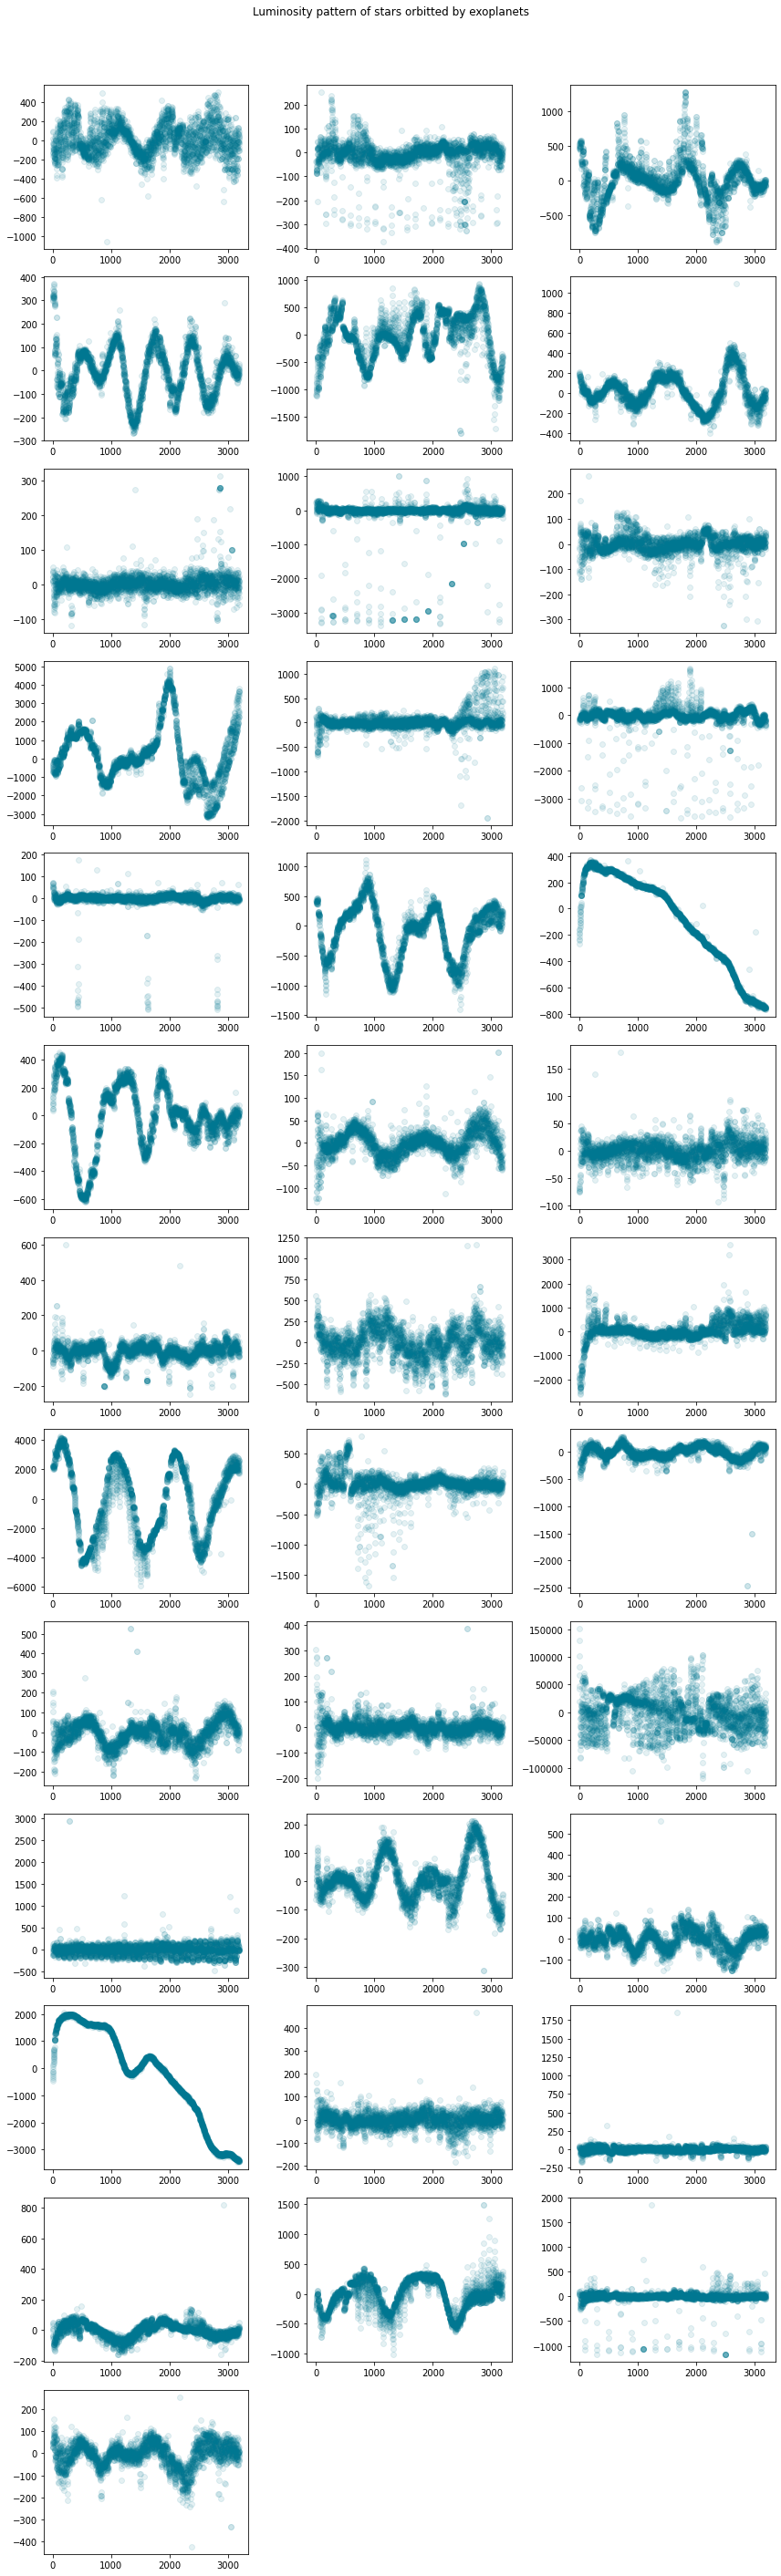

In [14]:
fig = plt.figure(figsize=(12, 40))
x = np.array(range(3197))
for i in range(len(train_exo)):
    ax = fig.add_subplot(13, 3, i+1)
    ax.scatter(x, train_exo.iloc[i,:], alpha=0.1, c='#007791')
fig.suptitle('Luminosity pattern of stars orbitted by exoplanets')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(fname='001', format='png', dpi=400)
plt.show()

Zoom in on a noisy one that looks like a straight line:

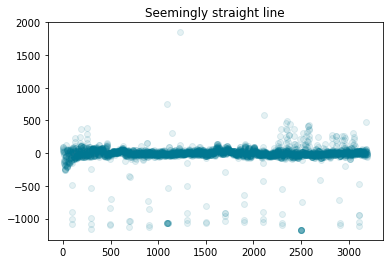

In [15]:
x = np.array(range(3197))
plt.scatter(x, train_exo.iloc[35,:], alpha=0.1, c='#007791')
plt.title('Seemingly straight line')
plt.savefig(fname='002', format='png', dpi=400)
plt.show()

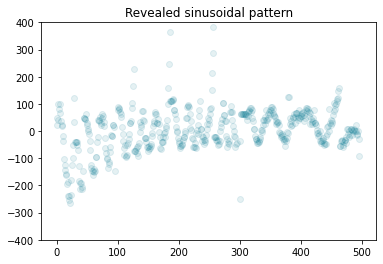

In [16]:
x = np.array(range(500))
plt.scatter(x, train_exo.iloc[35,:500], alpha=0.1, c='#007791')
plt.ylim([-400, 400])
plt.title('Revealed sinusoidal pattern')
plt.savefig(fname='003', format='png', dpi=400)
plt.show()

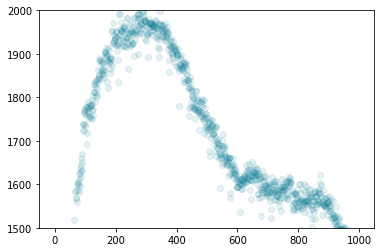

In [17]:
x = np.array(range(1000))
plt.scatter(x, train_exo.iloc[30,:1000], alpha=0.1, c='#007791')
plt.ylim([1500, 2000])
plt.show()

Notice some sinusoidal activity corresponding to variations in light intensity. Seem an object passes in front of the sun at regular intervals, lowering the light. This object is an exoplanet.

In [18]:
train_none = train[train['LABEL'] == 0].drop('LABEL', axis=1)
len(train_none)

5050

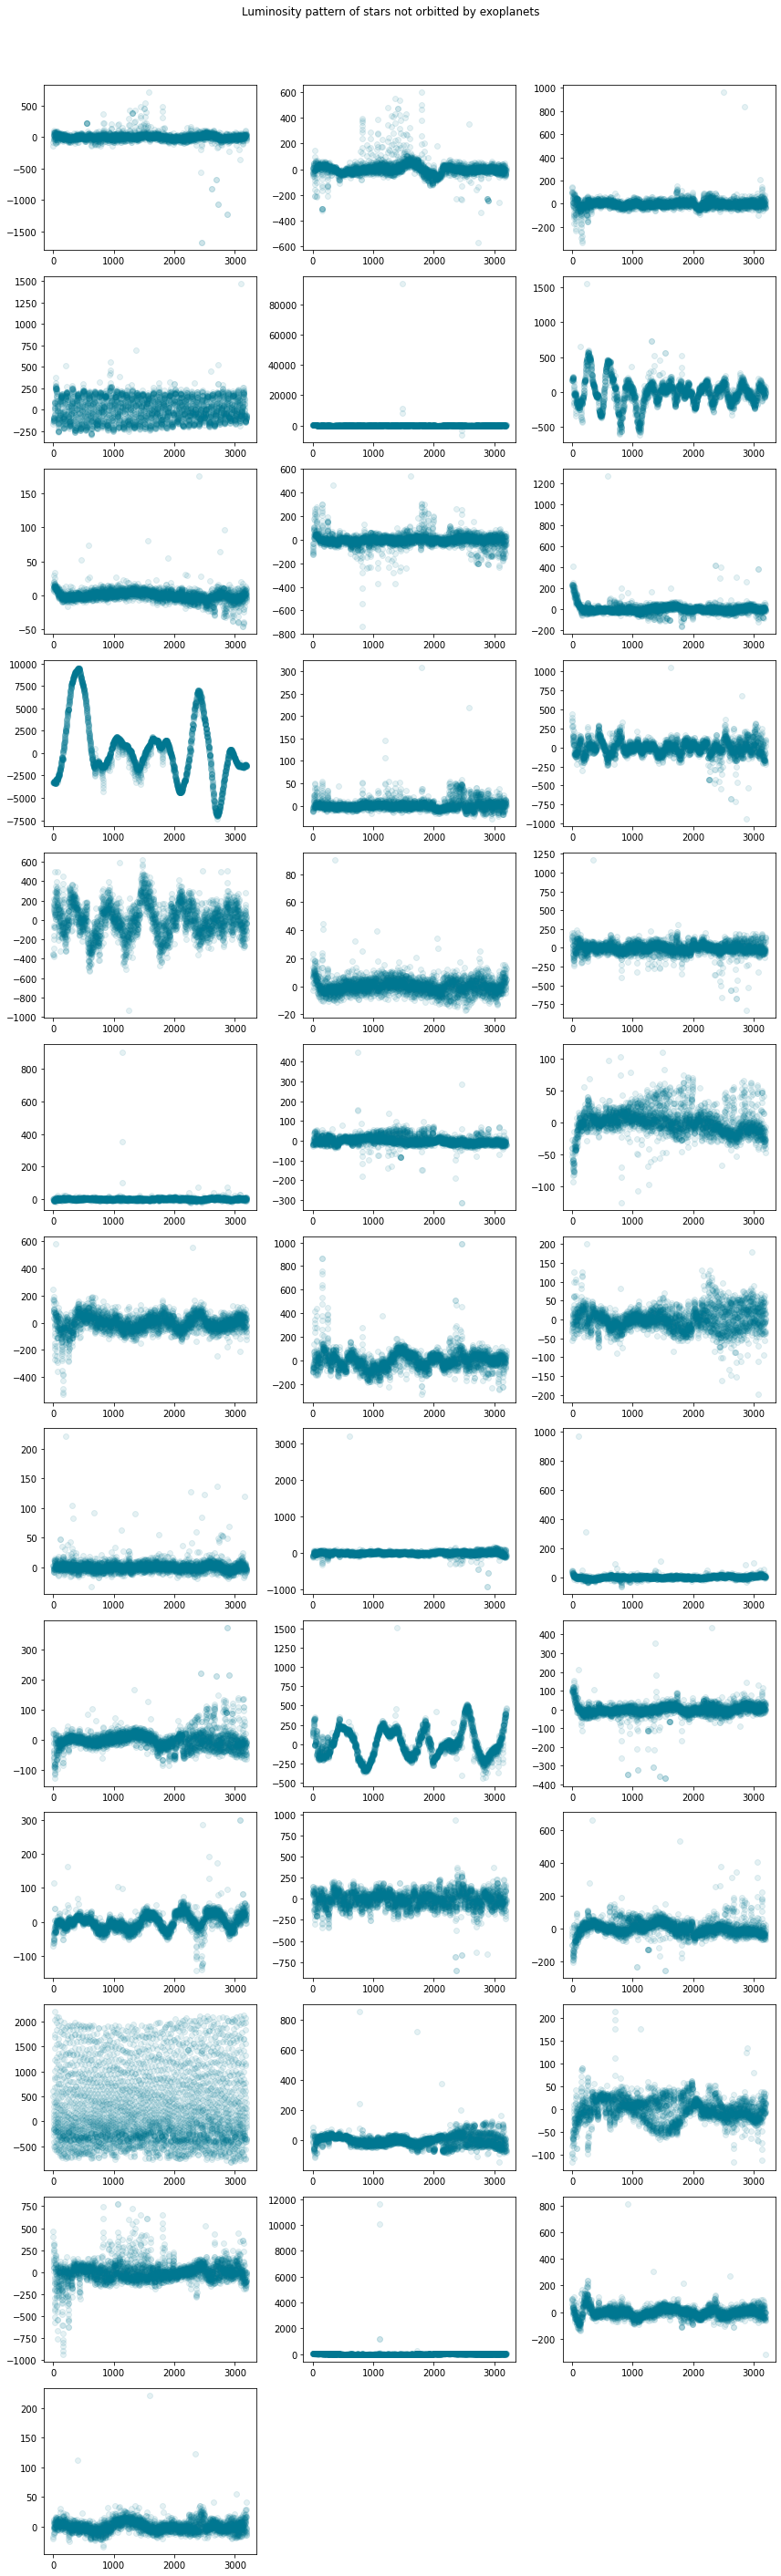

In [19]:
fig = plt.figure(figsize=(12, 40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13, 3, i+1)
    ax.scatter(x, train_none.iloc[i,:], alpha=0.1, c=teal)

fig.suptitle('Luminosity pattern of stars not orbitted by exoplanets')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Baseline model

In [20]:
baseline = pd.DataFrame(0, index=np.arange(len(test)), columns=['LABEL'])
comparison = baseline.LABEL == test.LABEL
comparison.sum() / len(comparison)

0.9912280701754386

We can achieve a 99.12% accuracy by predicting that none of the stars is orbited by an exoplanet. But we completely fail in our mission to actually identify exoplanets.

## Class imbalance

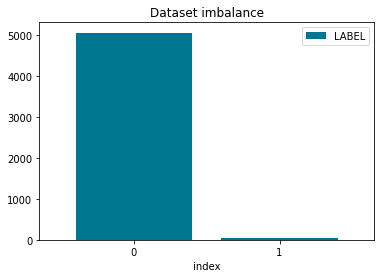

In [21]:
train['LABEL'].value_counts() \
              .reset_index()  \
              .plot(kind='bar', x='index', y='LABEL', rot=0, color=teal, width=0.8, title='Dataset imbalance') \
              .legend(loc='upper right')
plt.savefig(fname='004', format='png', dpi=400)
plt.show()

## SMOTE

In [22]:
model = SMOTE()
smote_train_x, smote_train_y = model.fit_resample(train_x, train_y)
smote_train_y = smote_train_y.astype('int')

In [48]:
smote_train_y.value_counts().sort_index()

0    5050
1    5050
Name: LABEL, dtype: int64

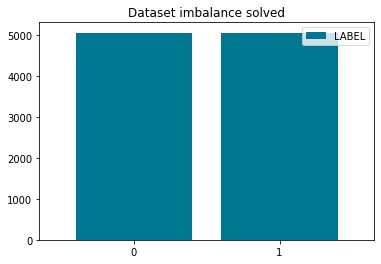

In [51]:
smote_train_y.value_counts() \
             .sort_index()   \
             .plot(kind='bar', x='index', y='LABEL', rot=0, color=teal, width=0.8,
                   title='Dataset imbalance solved') \
             .legend(loc='upper right')

plt.savefig(fname='005', format='png', dpi=400)
plt.show()

## Modeling

### Logistic regression

In [25]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
test_prediction = logreg.predict(test_x)
print('Logistic regression accuracy', accuracy_score(test_prediction, test_y))
print('Logistic regression F-score', f1_score(test_prediction, test_y))
print('Logistic regression precision', precision_score(test_prediction, test_y))

Logistic regression accuracy 0.5631578947368421
Logistic regression F-score 0.015810276679841896
Logistic regression precision 0.4


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


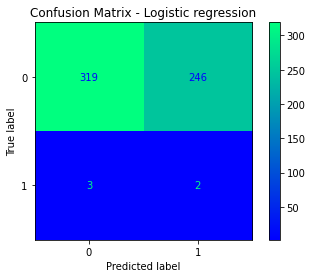

In [26]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - Logistic regression')
plt.savefig(fname='006', format='png', dpi=400)
plt.show()

### Logistic regression with SMOTE

In [27]:
smote_logreg = LogisticRegression()
smote_logreg.fit(smote_train_x, smote_train_y)
train_prediction = smote_logreg.predict(smote_train_x)
print('Logistic regression with SMOTE accuracy (SMOTE training data)', accuracy_score(train_prediction, smote_train_y))
print('Logistic regression with SMOTE F-score (SMOTE training data)', f1_score(train_prediction, smote_train_y))
print('Logistic regression with SMOTE precision (SMOTE training data)', precision_score(train_prediction, smote_train_y))

Logistic regression with SMOTE accuracy (SMOTE training data) 0.8137623762376237
Logistic regression with SMOTE F-score (SMOTE training data) 0.8430014189132794
Logistic regression with SMOTE precision (SMOTE training data) 1.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


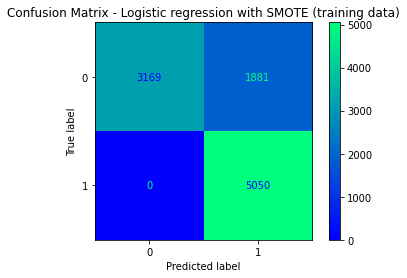

In [28]:
ConfusionMatrixDisplay.from_predictions(smote_train_y, train_prediction, cmap='winter')
plt.title('Confusion Matrix - Logistic regression with SMOTE (training data)')
plt.savefig(fname='007', format='png', dpi=400)
plt.show()

In [29]:
test_prediction = smote_logreg.predict(test_x)
print('Logistic regression with SMOTE accuracy (testing data)', accuracy_score(test_prediction, test_y))
print('Logistic regression with SMOTE F-score (testing data)', f1_score(test_prediction, test_y))
print('Logistic regression with SMOTE precision (testing data)', precision_score(test_prediction, test_y))

Logistic regression with SMOTE accuracy (testing data) 0.6052631578947368
Logistic regression with SMOTE F-score (testing data) 0.025974025974025972
Logistic regression with SMOTE precision (testing data) 0.6


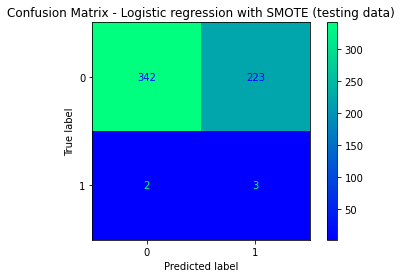

In [30]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - Logistic regression with SMOTE (testing data)')
plt.savefig(fname='008', format='png', dpi=400)
plt.show()

### SVM

In [31]:
svm = SVC(C=0.1, kernel='poly')
svm.fit(train_x, train_y)
test_prediction = svm.predict(test_x)
print('SVM accuracy', accuracy_score(test_prediction, test_y))
print('SVM F-score', f1_score(test_prediction, test_y))
print('SVM precision', precision_score(test_prediction, test_y))

SVM accuracy 0.9912280701754386
SVM F-score 0.0
SVM precision 0.0


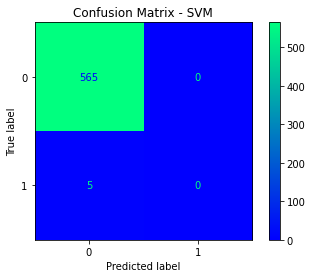

In [32]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - SVM')
plt.savefig(fname='009', format='png', dpi=400)
plt.show()

### SVM with SMOTE

In [33]:
smote_svm = SVC(C=0.1, kernel='poly')
smote_svm.fit(smote_train_x, smote_train_y)
train_prediction = smote_svm.predict(smote_train_x)
print('SVM with SMOTE accuracy (SMOTE training data)', accuracy_score(train_prediction, smote_train_y))
print('SVM with SMOTE F-score (SMOTE training data)', f1_score(train_prediction, smote_train_y))
print('SVM with SMOTE precision (SMOTE training data)', precision_score(train_prediction, smote_train_y))

SVM with SMOTE accuracy (SMOTE training data) 0.5078217821782178
SVM with SMOTE F-score (SMOTE training data) 0.030805225190095535
SVM with SMOTE precision (SMOTE training data) 0.015643564356435644


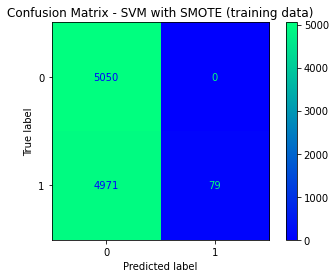

In [34]:
ConfusionMatrixDisplay.from_predictions(smote_train_y, train_prediction, cmap='winter')
plt.title('Confusion Matrix - SVM with SMOTE (training data)')
plt.savefig(fname='010', format='png', dpi=400)
plt.show()

In [35]:
test_prediction = smote_svm.predict(test_x)
print('SVM with SMOTE accuracy (testing data)', accuracy_score(test_prediction, test_y))
print('SVM with SMOTE F-score (testing data)', f1_score(test_prediction, test_y))
print('SVM with SMOTE precision (testing data)', precision_score(test_prediction, test_y))

SVM with SMOTE accuracy (testing data) 0.9912280701754386
SVM with SMOTE F-score (testing data) 0.0
SVM with SMOTE precision (testing data) 0.0


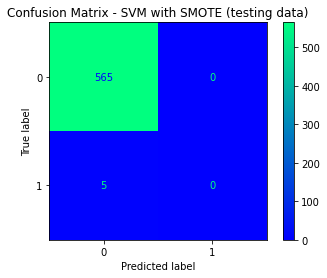

In [36]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - SVM with SMOTE (testing data)')
plt.savefig(fname='011', format='png', dpi=400)
plt.show()

### Decision tree

In [37]:
dt = DecisionTreeClassifier(max_depth=5, random_state=13)
dt.fit(train_x, train_y)
test_prediction = dt.predict(test_x)
print('Decision tree accuracy', accuracy_score(test_prediction, test_y))
print('Decision tree F-score', f1_score(test_prediction, test_y))
print('Decision tree precision', precision_score(test_prediction, test_y))

Decision tree accuracy 0.9894736842105263
Decision tree F-score 0.25
Decision tree precision 0.2


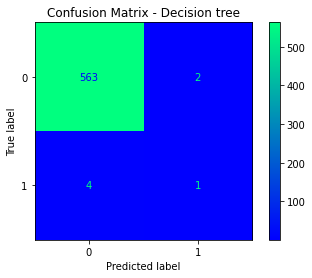

In [38]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - Decision tree')
plt.savefig(fname='012', format='png', dpi=400)
plt.show()

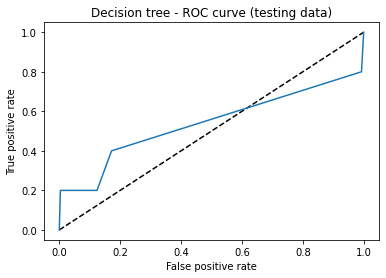

In [39]:
y_pred_prob = dt.predict_proba(test_x)[:,1]
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, y_pred_prob, pos_label=1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_pos_rate, true_pos_rate, label='Decision tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision tree - ROC curve (testing data)')
plt.savefig(fname='013', format='png', dpi=400)
plt.show()

### Decision tree with SMOTE

In [40]:
smote_dt = DecisionTreeClassifier(max_depth=5, random_state=13)
smote_dt.fit(smote_train_x, smote_train_y)
train_prediction = smote_dt.predict(smote_train_x)
print('Decision tree with SMOTE accuracy (SMOTE training data)', accuracy_score(train_prediction, smote_train_y))
print('Decision tree with SMOTE F-score (SMOTE training data)', f1_score(train_prediction, smote_train_y))
print('Decision tree with SMOTE precision (SMOTE training data)', precision_score(train_prediction, smote_train_y))

Decision tree with SMOTE accuracy (SMOTE training data) 0.9388118811881188
Decision tree with SMOTE F-score (SMOTE training data) 0.9400930593253198
Decision tree with SMOTE precision (SMOTE training data) 0.9601980198019802


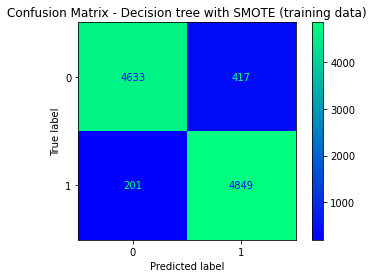

In [41]:
ConfusionMatrixDisplay.from_predictions(smote_train_y, train_prediction, cmap='winter')
plt.title('Confusion Matrix - Decision tree with SMOTE (training data)')
plt.savefig(fname='014', format='png', dpi=400)
plt.show()

In [42]:
test_prediction = smote_dt.predict(test_x)
print('Decision tree with SMOTE accuracy (testing data)', accuracy_score(test_prediction, test_y))
print('Decision tree with SMOTE F-score (testing data)', f1_score(test_prediction, test_y))
print('Decision tree with SMOTE precision (testing data)', precision_score(test_prediction, test_y))

Decision tree with SMOTE accuracy (testing data) 0.9228070175438596
Decision tree with SMOTE F-score (testing data) 0.12000000000000001
Decision tree with SMOTE precision (testing data) 0.6


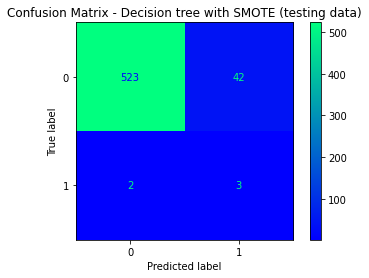

In [43]:
ConfusionMatrixDisplay.from_predictions(test_y, test_prediction, cmap='winter')
plt.title('Confusion Matrix - Decision tree with SMOTE (testing data)')
plt.savefig(fname='015', format='png', dpi=400)
plt.show()

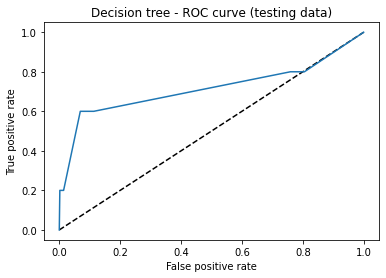

In [44]:
y_pred_prob = smote_dt.predict_proba(test_x)[:,1]
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, y_pred_prob, pos_label=1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_pos_rate, true_pos_rate, label='Decision tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision tree - ROC curve (testing data)')
plt.savefig(fname='016', format='png', dpi=400)
plt.show()